# Decision Trees

**Decision Tree**

The basic intuition behind a decision tree is to map out all the possible deicision paths in the form of a tree
* Each *internal node* corresponds to a test
* Each *branch* corresponds to a result of the test
* each "leaf node" assigns a classification

**Entropy**

Measure of randomness or uncertainty
* The lower the Entropy, the less uniform the distribution, the purer the node
* $Entropy = -p(A)log(p(A)) - p(B)log(p(B))$

**Information gain**

Is the information that can increase the level of certainty ater splitting
* $Informationgain = (Entropybeforesplit) - (weighted entropy after split)$

**Algorithm**
1. Choose an attribute from your dataset
2. Calculate the significance od attribute in splitting data
3. Split data based on the value of the best attribute
4. Go to step 1

In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

**About the dataset**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [2]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2021-11-13 21:47:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2021-11-13 21:47:15 (1.03 GB/s) - ‘drug200.csv’ saved [5827/5827]



In [19]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [20]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [21]:
print("The types of gender are: {}".format(df["Sex"].unique()))
print("the counts of each kind gender: \n{}".format(df["Sex"].value_counts()))

The types of gender are: ['F' 'M']
the counts of each kind gender: 
M    104
F     96
Name: Sex, dtype: int64


In [22]:
print("The types of blood presure are: {}".format(df["BP"].unique()))
print("the counts of each kind blood presure: \n{}".format(df["BP"].value_counts()))

The types of blood presure are: ['HIGH' 'LOW' 'NORMAL']
the counts of each kind blood presure: 
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


In [23]:
print("The types of Cholesterol are: {}".format(df["Cholesterol"].unique()))
print("the counts of each kind Cholesterol: \n{}".format(df["Cholesterol"].value_counts()))

The types of Cholesterol are: ['HIGH' 'NORMAL']
the counts of each kind Cholesterol: 
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


In [24]:
print("The types of Drug are: {}".format(df["Drug"].unique()))
print("the counts of each kind Drug: \n{}".format(df["Drug"].value_counts()))

The types of Drug are: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
the counts of each kind Drug: 
drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64


**Pre - processing**

let's transform to as an array the features (X):
* Age
* Sex: **0 - Female, 1 - male**
* Blood pressure: **0 -- "low", 1 -- "normal", 2 -- "High"**
* Cholesterol: **0 -- "Normal", 1 -- "High"**
* Na_to_K

Target (y):
* Drug: **0 -- "Drug A", 1 -- "Drug B", 2 -- "Drug C", 3 -- "Drug X", 4 -- "Drug Y"**


In [25]:
#change the categorical variables to scalar variables
#sex
sex = {"F":0, "M":1}
df["Sex"] = df["Sex"].map(sex)

#Blood pressure
BP = {"LOW":0, "NORMAL":1, "HIGH":2}
df["BP"] = df["BP"].map(BP)

#Cholesterol
cholesterol = {"NORMAL":0, "HIGH":1}
df["Cholesterol"] = df["Cholesterol"].map(cholesterol)

drugs = {"drugA": 0, "drugB":1, "drugC":2, "drugX":3, "drugY":4}
df["Drug"] = df["Drug"].map(drugs)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


In [26]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [29]:
X = np.asanyarray(df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]])
y = np.asanyarray(df[["Drug"]])
X[0:5]
y[0:5]

array([[4],
       [2],
       [2],
       [3],
       [4]])

**Setting up the Decision Tree**


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [33]:
print("The shape of the training set: {}".format(X_train.shape[0]))
print("The shape of the test set: {}".format(X_test.shape[0]))

The shape of the training set: 140
The shape of the test set: 60


**Modeling**

In [36]:
dc_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dc_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
dc_tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_hat = dc_tree.predict(X_test)

In [39]:
print("The original data: {}".format(y_test[0:5]))
print("The predict data: {}".format(y_hat[0:5]))

The original data: [[4]
 [3]
 [3]
 [3]
 [3]]
The predict data: [4 3 3 3 3]


In [40]:
from sklearn import metrics

In [43]:
print("Decision Tree's Accuracy: {}".format(metrics.accuracy_score(y_test, y_hat)))

Decision Tree's Accuracy: 0.9833333333333333


**Accuracy classification** score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

**Visualization**

In [44]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

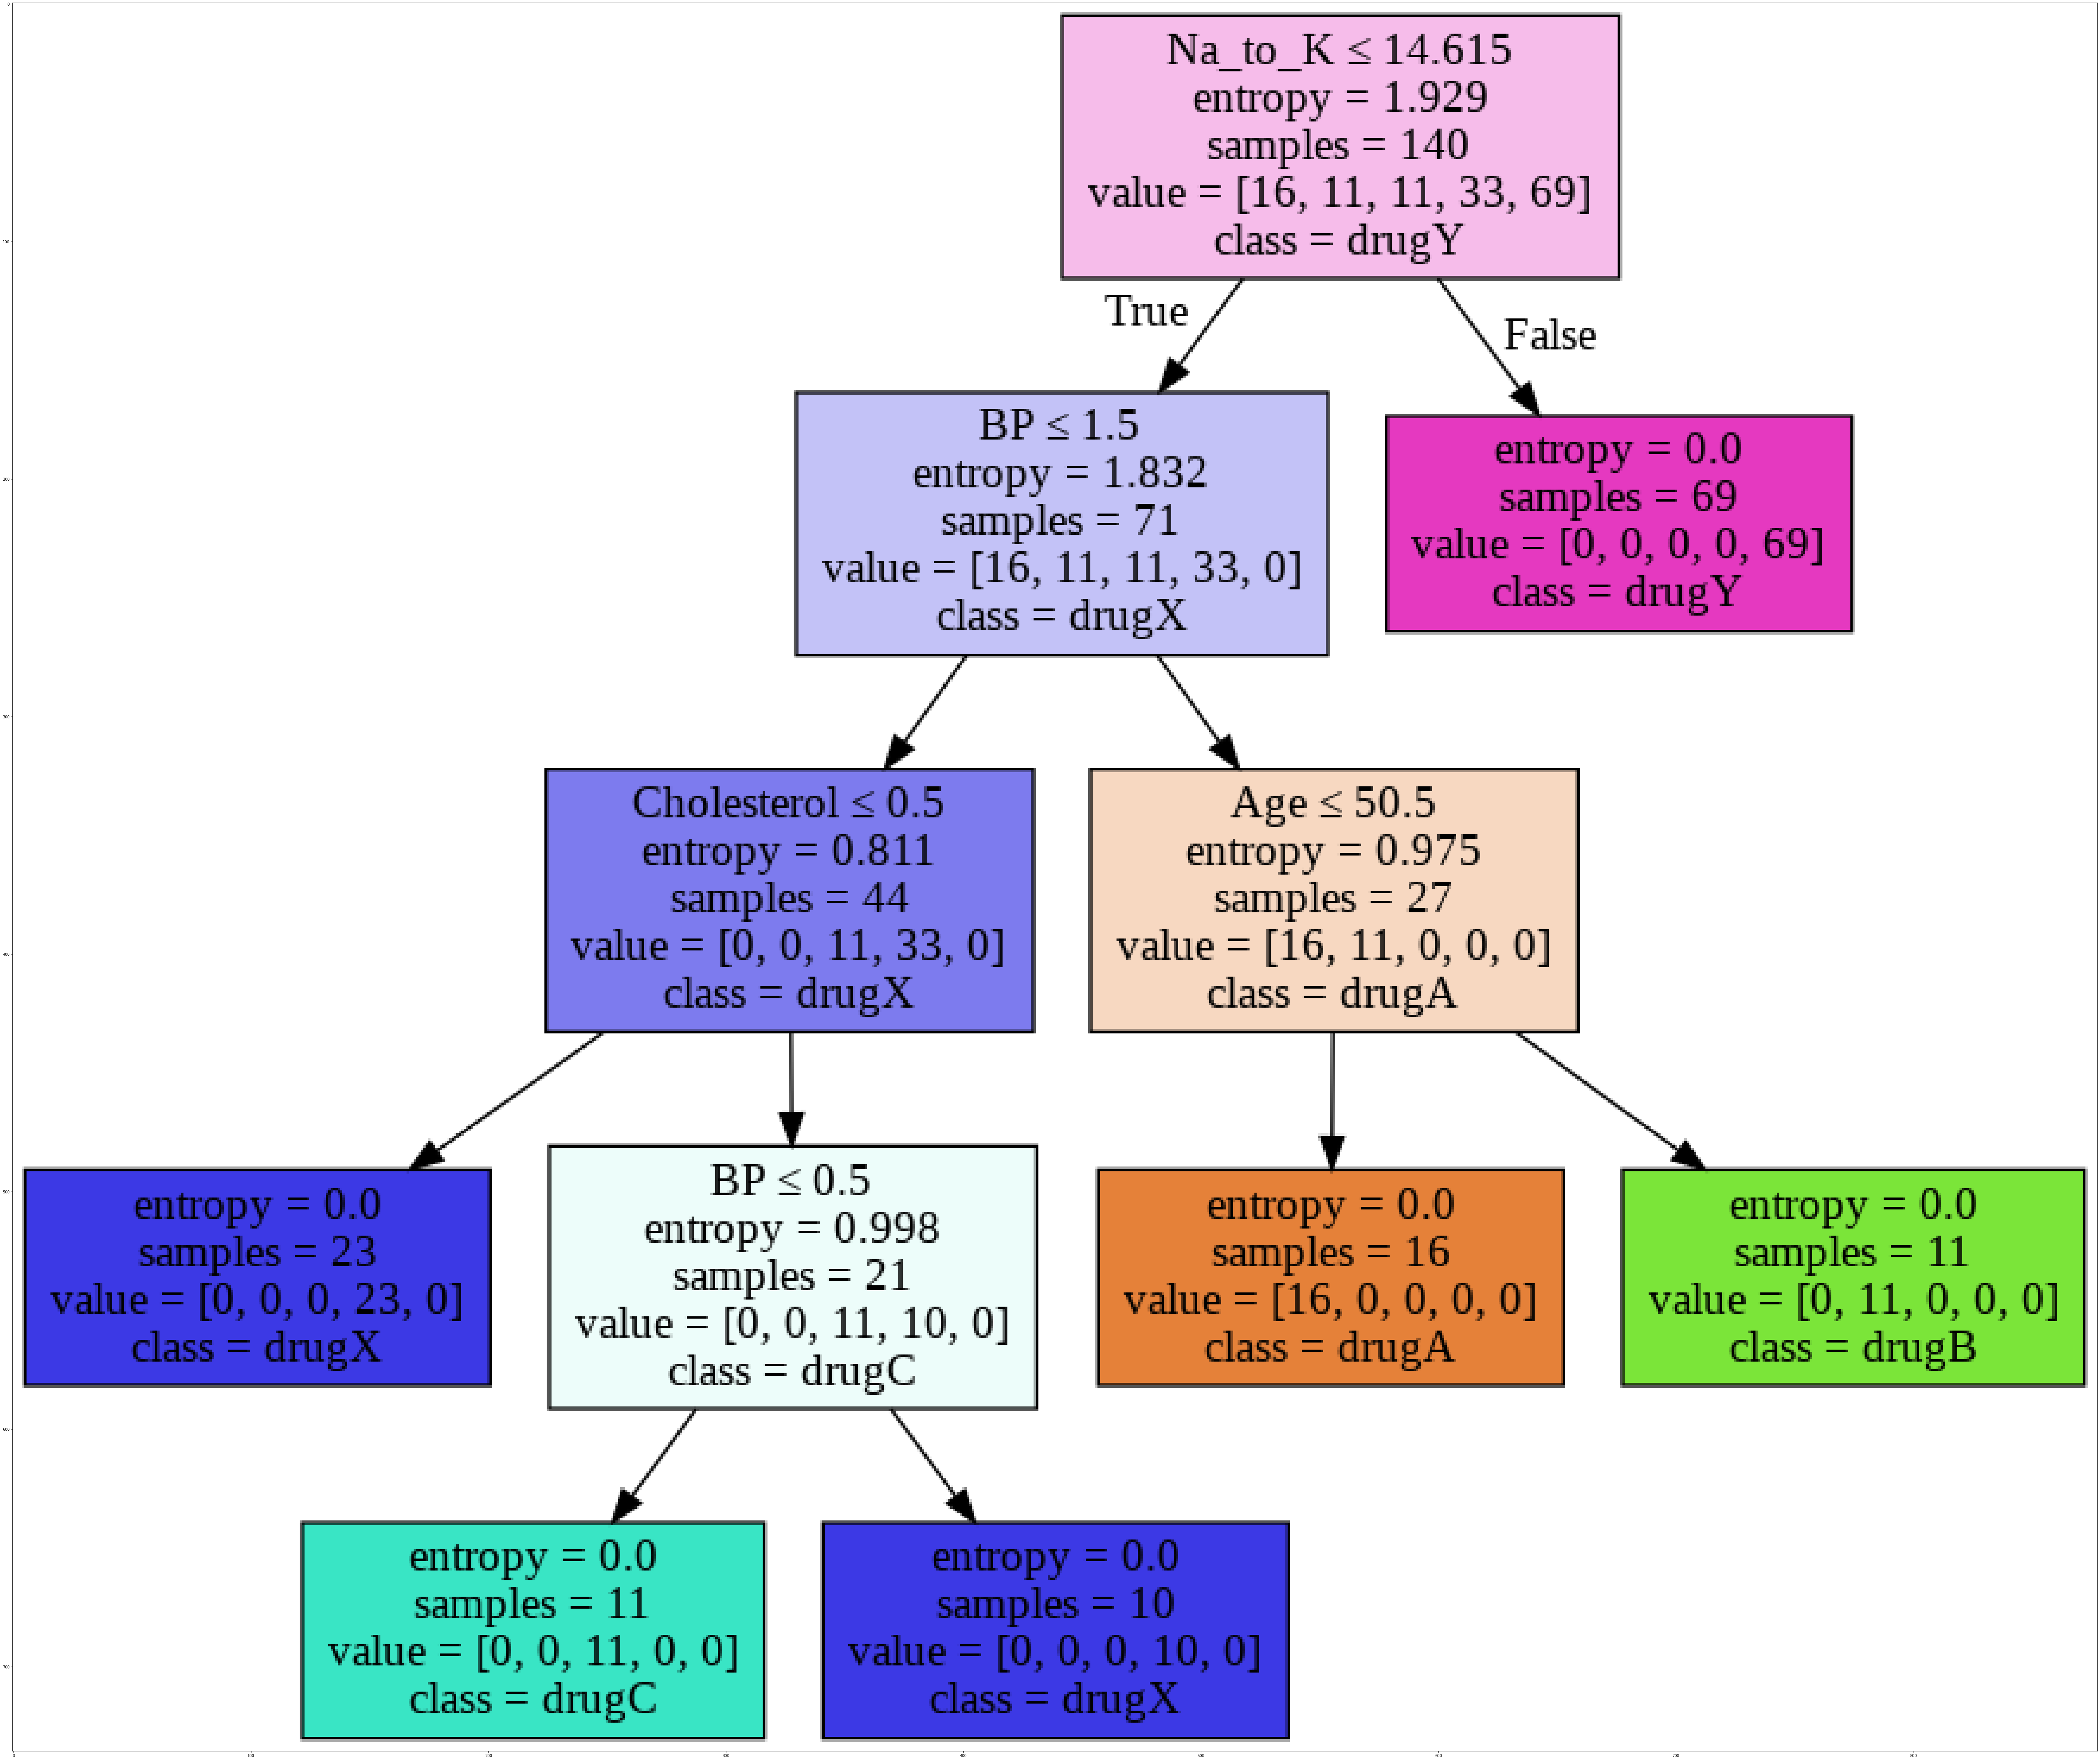

In [51]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out = tree.export_graphviz(dc_tree, feature_names = featureNames, out_file = dot_data, class_names = ["drugA", "drugB", "drugC", "drugX", "drugY"], filled = True,  
                         special_characters = True, rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')